In [54]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [57]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def f(W,x,layers):
    a=x
    for l in range(layers-1):
        w = W[l];
        #print(w.shape)
        a = sigmoid(np.matmul(np.transpose(w),a))
    #print('a value before last layer:',a)
    a = sigmoid(W[layers-1,0,0]*a[0]+W[layers-1,1,0]*a[1])
    #print('a value after last layer:',a)
    return a;

def error_func(y,y_hat):
    return y*np.log(y_hat)+(1-y)*np.log(1-y_hat)

def CEO(nj_list,tau,mean,sigma,layers,X,Y,rho):
    complete_weights = np.ones((tau,1,layers,2,2))
    error_vals=[];
    for i in tqdm(range(tau)):
        W = np.ones((nj_list[i],layers,2,2))*0.5
        W[:,-1,:,-1] = 0
        objective_function_list = np.zeros(nj_list[i])
        for j in range(nj_list[i]):
            for l in range(layers):
                w11,w12 = np.random.normal(mean[l][0],sigma[l][0],2)
                w21,w22 = np.random.normal(mean[l][1],sigma[l][0],2)
                W[j][l][0] = np.array([w11,w12])
                W[j][l][1] = np.array([w21,w22])
            W[:,-1,:,-1] = 0
            error = 0
            #print(X,Y)
            for x,y in zip(X,Y):
                a = f(W[j],x,layers)
                error = error + np.abs(error_func(y,a))
            objective_function_list[j] = error
        #print('Objective function list:',objective_function_list)
        #complete_weights[i] = W
        considered_indices = np.argsort(objective_function_list)
        mean_error = np.mean(objective_function_list[considered_indices[:int(rho*nj_list[i])]])
        error_vals.append(mean_error)
        for l in range(layers-1):
            mean[l] = np.mean(np.mean(W[considered_indices[:int(rho*nj_list[i])],l],0),1)#np.mean(W[considered_indices[:int(rho*nj_list[i])],l,0])
        # print(mean.shape)
        mean[-1][0] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[0][0]
        mean[-1][1] = np.mean(W[considered_indices[:int(rho*nj_list[i])],layers-1],0)[1][0]
        
    return mean,error_vals
X = np.array([[1,1],[1,2]])
y = np.array([[1],[0]])
list_of_tau = [100,150,190,80,50,150,200,300,80,70]
mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

100%|██████████| 10/10 [00:00<00:00, 79.54it/s]


[1.3952683471627594, 1.3939709404182792, 1.3923072720986003, 1.3928536367530506, 1.3939903584353386, 1.3867218112684363, 1.3866724889636586, 1.3847784387079716, 1.3874788359693107, 1.3857150248086048]


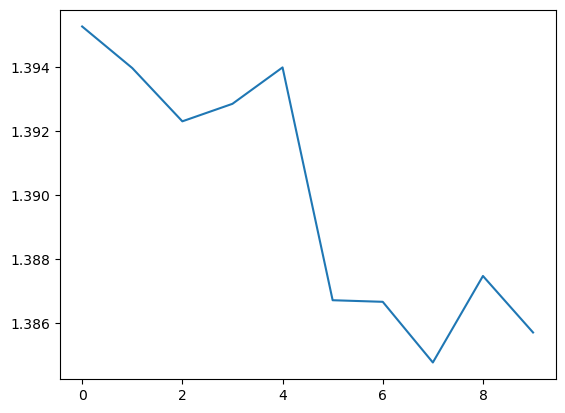

In [4]:
print(error_vals)
from matplotlib import pyplot as plt
plt.plot(error_vals)

100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

[83.30464343393247, 90.54319816744014, 83.50863822782311, 80.1784369416604, 83.1780445287907, 78.80762676032853, 81.96848597348318, 78.87135349571986, 84.21474891811393, 79.48967455315221]


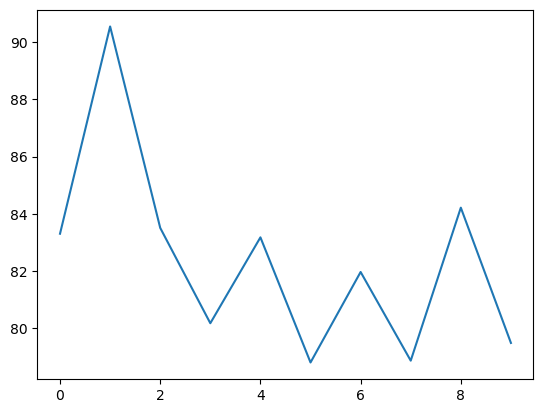

In [60]:
df = pd.read_csv('./iris/reduced_iris.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)

  0%|          | 0/10 [00:00<?, ?it/s]/var/folders/wx/m13c2nmx72n4d9ng8bz_kn340000gn/T/ipykernel_7861/3382553690.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))
100%|██████████| 10/10 [06:51<00:00, 41.11s/it]

[7526.008104982678, 4943.917758658291, 3920.5881535808157, 3668.2226560600393, 3588.606427511542, 3581.57076669708, 3518.6011642518224, 3488.654448408998, 3410.8517478906747, 3364.9966417378496]


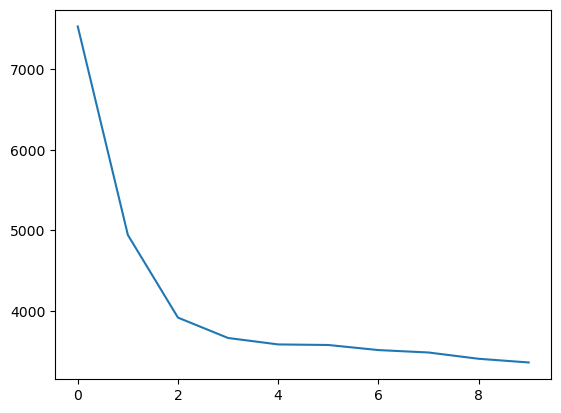

In [70]:
df = pd.read_csv('./pulsar/Pulsar_reduced.csv')
df.drop(df.columns[[0]], axis=1, inplace=True)
cols = df.columns
y = df[cols[-1]]
X = df.drop(cols[-1],axis=1)

X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=int)

y = np.array([[i] for i in y])

mean,error_vals = CEO(list_of_tau,len(list_of_tau),np.ones((3,2))*0.5,np.ones((3,2)),3,X,y,0.3)

print(error_vals)
plt.plot(error_vals)